# Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Data

In [2]:
reactions_types_df = pd.read_csv("ReactionTypes (1).csv")
reactions_df = pd.read_csv("Reactions (1).csv")
content_df = pd.read_csv("Content (1).csv")


# Understand the Data

In [3]:
reactions_types_df.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [4]:
reactions_df.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [5]:
content_df.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [6]:
reactions_types_df.shape

(16, 4)

In [7]:
reactions_df.shape

(25553, 5)

In [8]:
content_df.shape

(1000, 6)

# Checking for Missing Values

## Missing values - Reactions_types

In [9]:
reactions_types_df.isna().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

In [10]:
reactions_types_df_missing_values_percentage = (reactions_types_df.isna().sum() / len(reactions_types_df)) * 100
print(reactions_types_df_missing_values_percentage)

Unnamed: 0    0.0
Type          0.0
Sentiment     0.0
Score         0.0
dtype: float64


## Missing values - Reactions

In [11]:
missing_reactions=reactions_df.isna().sum()
missing_reactions

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [12]:
reactions_df_missing_values_percentage = (reactions_df.isna().sum() / len(reactions_df)) * 100
print(reactions_df_missing_values_percentage)

Unnamed: 0     0.000000
Content ID     0.000000
User ID       11.814660
Type           3.835166
Datetime       0.000000
dtype: float64


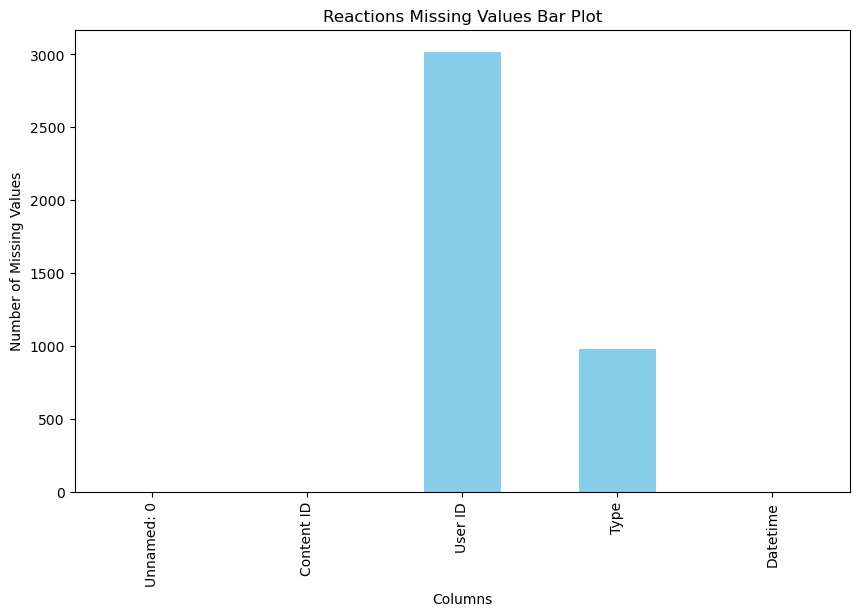

In [13]:
# Visualize missing values with a bar plot
missing_reactions.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Reactions Missing Values Bar Plot")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()

## Missing values - Content

In [14]:
missing_content=content_df.isna().sum()
missing_content

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [15]:
content_df_missing_values_percentage = (content_df.isna().sum() / len(content_df)) * 100
print(content_df_missing_values_percentage)

Unnamed: 0     0.0
Content ID     0.0
User ID        0.0
Type           0.0
Category       0.0
URL           19.9
dtype: float64


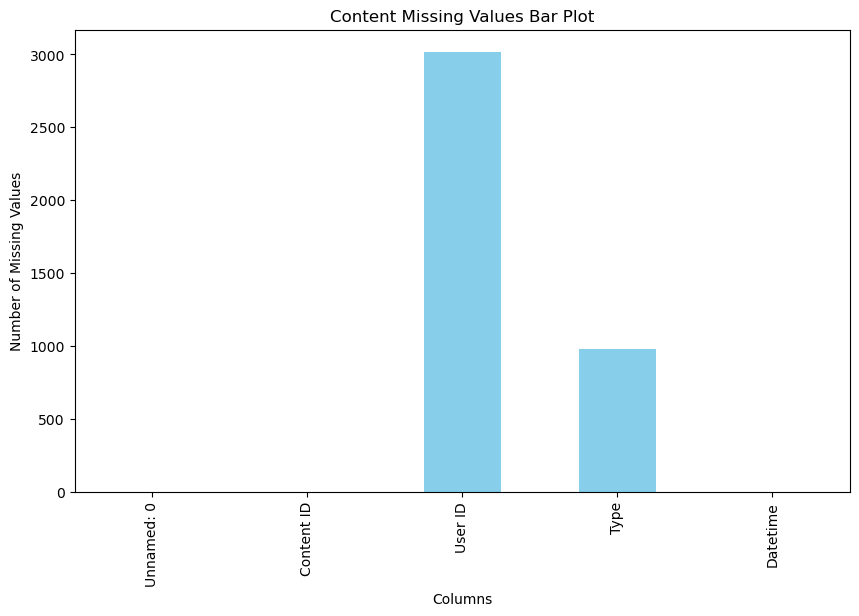

In [16]:
# Visualize missing values with a bar plot
missing_reactions.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Content Missing Values Bar Plot")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()

# Data Cleaning in three DataFrames

## Drop unnecessary columns:

In [17]:
content_df=content_df.drop(columns=['URL','Unnamed: 0','User ID'],axis=1)

In [18]:
content_df.head()

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


## Rename Column Names

In [19]:
content_df.rename(columns={'Type': 'Content Type'}, inplace=True)

In [20]:
content_df.head()

,Content ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [21]:
content_df['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [22]:
# Cleaning the Category Column by Removing Extra Quotes

content_df['Category'] = content_df['Category'].str.replace('"', '', regex=False)

In [23]:
content_df['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', 'Fitness', 'Veganism', 'Travel', 'Education',
       'Technology', 'Soccer', 'Culture', 'Food', 'Healthy Eating',
       'Science', 'Public Speaking'], dtype=object)

In [24]:
content_df['Category'] = content_df['Category'].str.lower()

In [25]:
content_df['Category'].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

In [26]:
reactions_df.isna().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [27]:
# Removing unnessary rows in specific column

reactions_df = reactions_df.dropna(subset=['Type'])

In [28]:
reactions_df.isna().sum()

Unnamed: 0       0
Content ID       0
User ID       2039
Type             0
Datetime         0
dtype: int64

In [29]:
# drop the column
reactions_df.drop('User ID',axis=1,inplace=True)

In [30]:
reactions_df.isna().sum()

Unnamed: 0    0
Content ID    0
Type          0
Datetime      0
dtype: int64

In [31]:
# Rename Column Names

reactions_df.rename(columns={'Type': 'Reaction Type'}, inplace=True)

In [32]:
reactions_df.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [33]:
# drop the column

reactions_df.drop('Unnamed: 0',axis=1,inplace=True)

In [34]:
reactions_df.head()

,Content ID,Reaction Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


## Convert the Datetime column to datetime format

In [35]:
reactions_df.dtypes

Content ID       object
Reaction Type    object
Datetime         object
dtype: object

In [36]:
reactions_df['Datetime'] = pd.to_datetime(reactions_df['Datetime'])

In [37]:
reactions_df.dtypes

Content ID               object
Reaction Type            object
Datetime         datetime64[ns]
dtype: object

In [38]:
reactions_types_df.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [39]:
reactions_types_df.drop('Unnamed: 0',axis=1,inplace=True)

In [40]:
reactions_types_df.rename(columns={'Type': 'Reaction Type'}, inplace=True)

In [41]:
reactions_types_df.head()

,Reaction Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [42]:
reactions_df.head()

,Content ID,Reaction Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [43]:
content_df.head()

,Content ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


## Merge reactions_df with content_df on Content ID using a left join.

In [44]:
merged_df = reactions_df.merge(content_df, on='Content ID', how='left')

In [45]:
merged_df.head()

,Content ID,Reaction Type,Datetime,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying


In [46]:
merged_df.shape

(24573, 5)

In [47]:
merged_df.isna().sum()

Content ID       0
Reaction Type    0
Datetime         0
Content Type     0
Category         0
dtype: int64

## Merge the resulting DataFrame with reactions_types_df on Reaction Type using a left join.

In [48]:
final_df = merged_df.merge(reactions_types_df, left_on='Reaction Type', right_on='Reaction Type', how='left')

In [49]:
final_df.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying,positive,30


In [50]:
final_df.shape

(24573, 7)

In [51]:
final_df.isna().sum()

Content ID       0
Reaction Type    0
Datetime         0
Content Type     0
Category         0
Sentiment        0
Score            0
dtype: int64

In [52]:
final_df.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying,positive,30


In [53]:
final_df.dtypes

Content ID               object
Reaction Type            object
Datetime         datetime64[ns]
Content Type             object
Category                 object
Sentiment                object
Score                     int64
dtype: object

In [54]:
final_df.duplicated().sum()

0

In [55]:
grouped_df = final_df.groupby('Category').agg({'Score': 'sum'})

In [56]:
grouped_df.sort_values(by='Score', ascending=False)

,Score
Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676
culture,66579
travel,64880
cooking,64756
soccer,57783


# Top_5_Categories

In [57]:
top_5_categories = grouped_df.sort_values(by='Score', ascending=False).head()
top_5_categories

,Score
Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676


In [58]:
output_path = "C:\\Users\\Tharu\\OneDrive\\Documents\\Cleaned_and_Merged_New_File"
final_df.to_csv(output_path, index=False)